In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from matplotlib import pyplot
rcParams['figure.figsize'] = 40,30
from sklearn.model_selection import train_test_split
from pandas.tseries.offsets import Day
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
#from pyramid.arima import auto_arima
import itertools
import statsmodels.api as sm
plt.style.use('fivethirtyeight')
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

from math import sqrt
from pandas import Series
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt


    0    1    2    3    4    5    6    7    8    9    ...  109  110  111  112  \
0     1   53   40   37   45   69  105   62  101  104  ...    9   51   47   57   
1     4    0    0    2    4    0    8    0    6    3  ...   31   27   31   39   
2     5   57  133   60  126   90   87  107  120  182  ...   20   32   24    5   
3     6  108  130  143   92   88  101   66   75   89  ...   17    0    0   10   
4    10    0    0    2    0    4    0   36    3   37  ...   14   26   45   22   
..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
95  865    0    0    0    0    0    0    0    0    0  ...    3    3    7    6   
96  922    0    0    0    0    0    0    1    0    0  ...    2    6    2    7   
97  949    0    1    2    1    3    7    5    2    2  ...    1    0    5    1   
98  962    1    4    2    2    1    4    3    3    2  ...    0    0    1    2   
99  964    0    1    0    0    1    1    1    2    2  ...    1    4    5    1   

    113  114  115  116  117

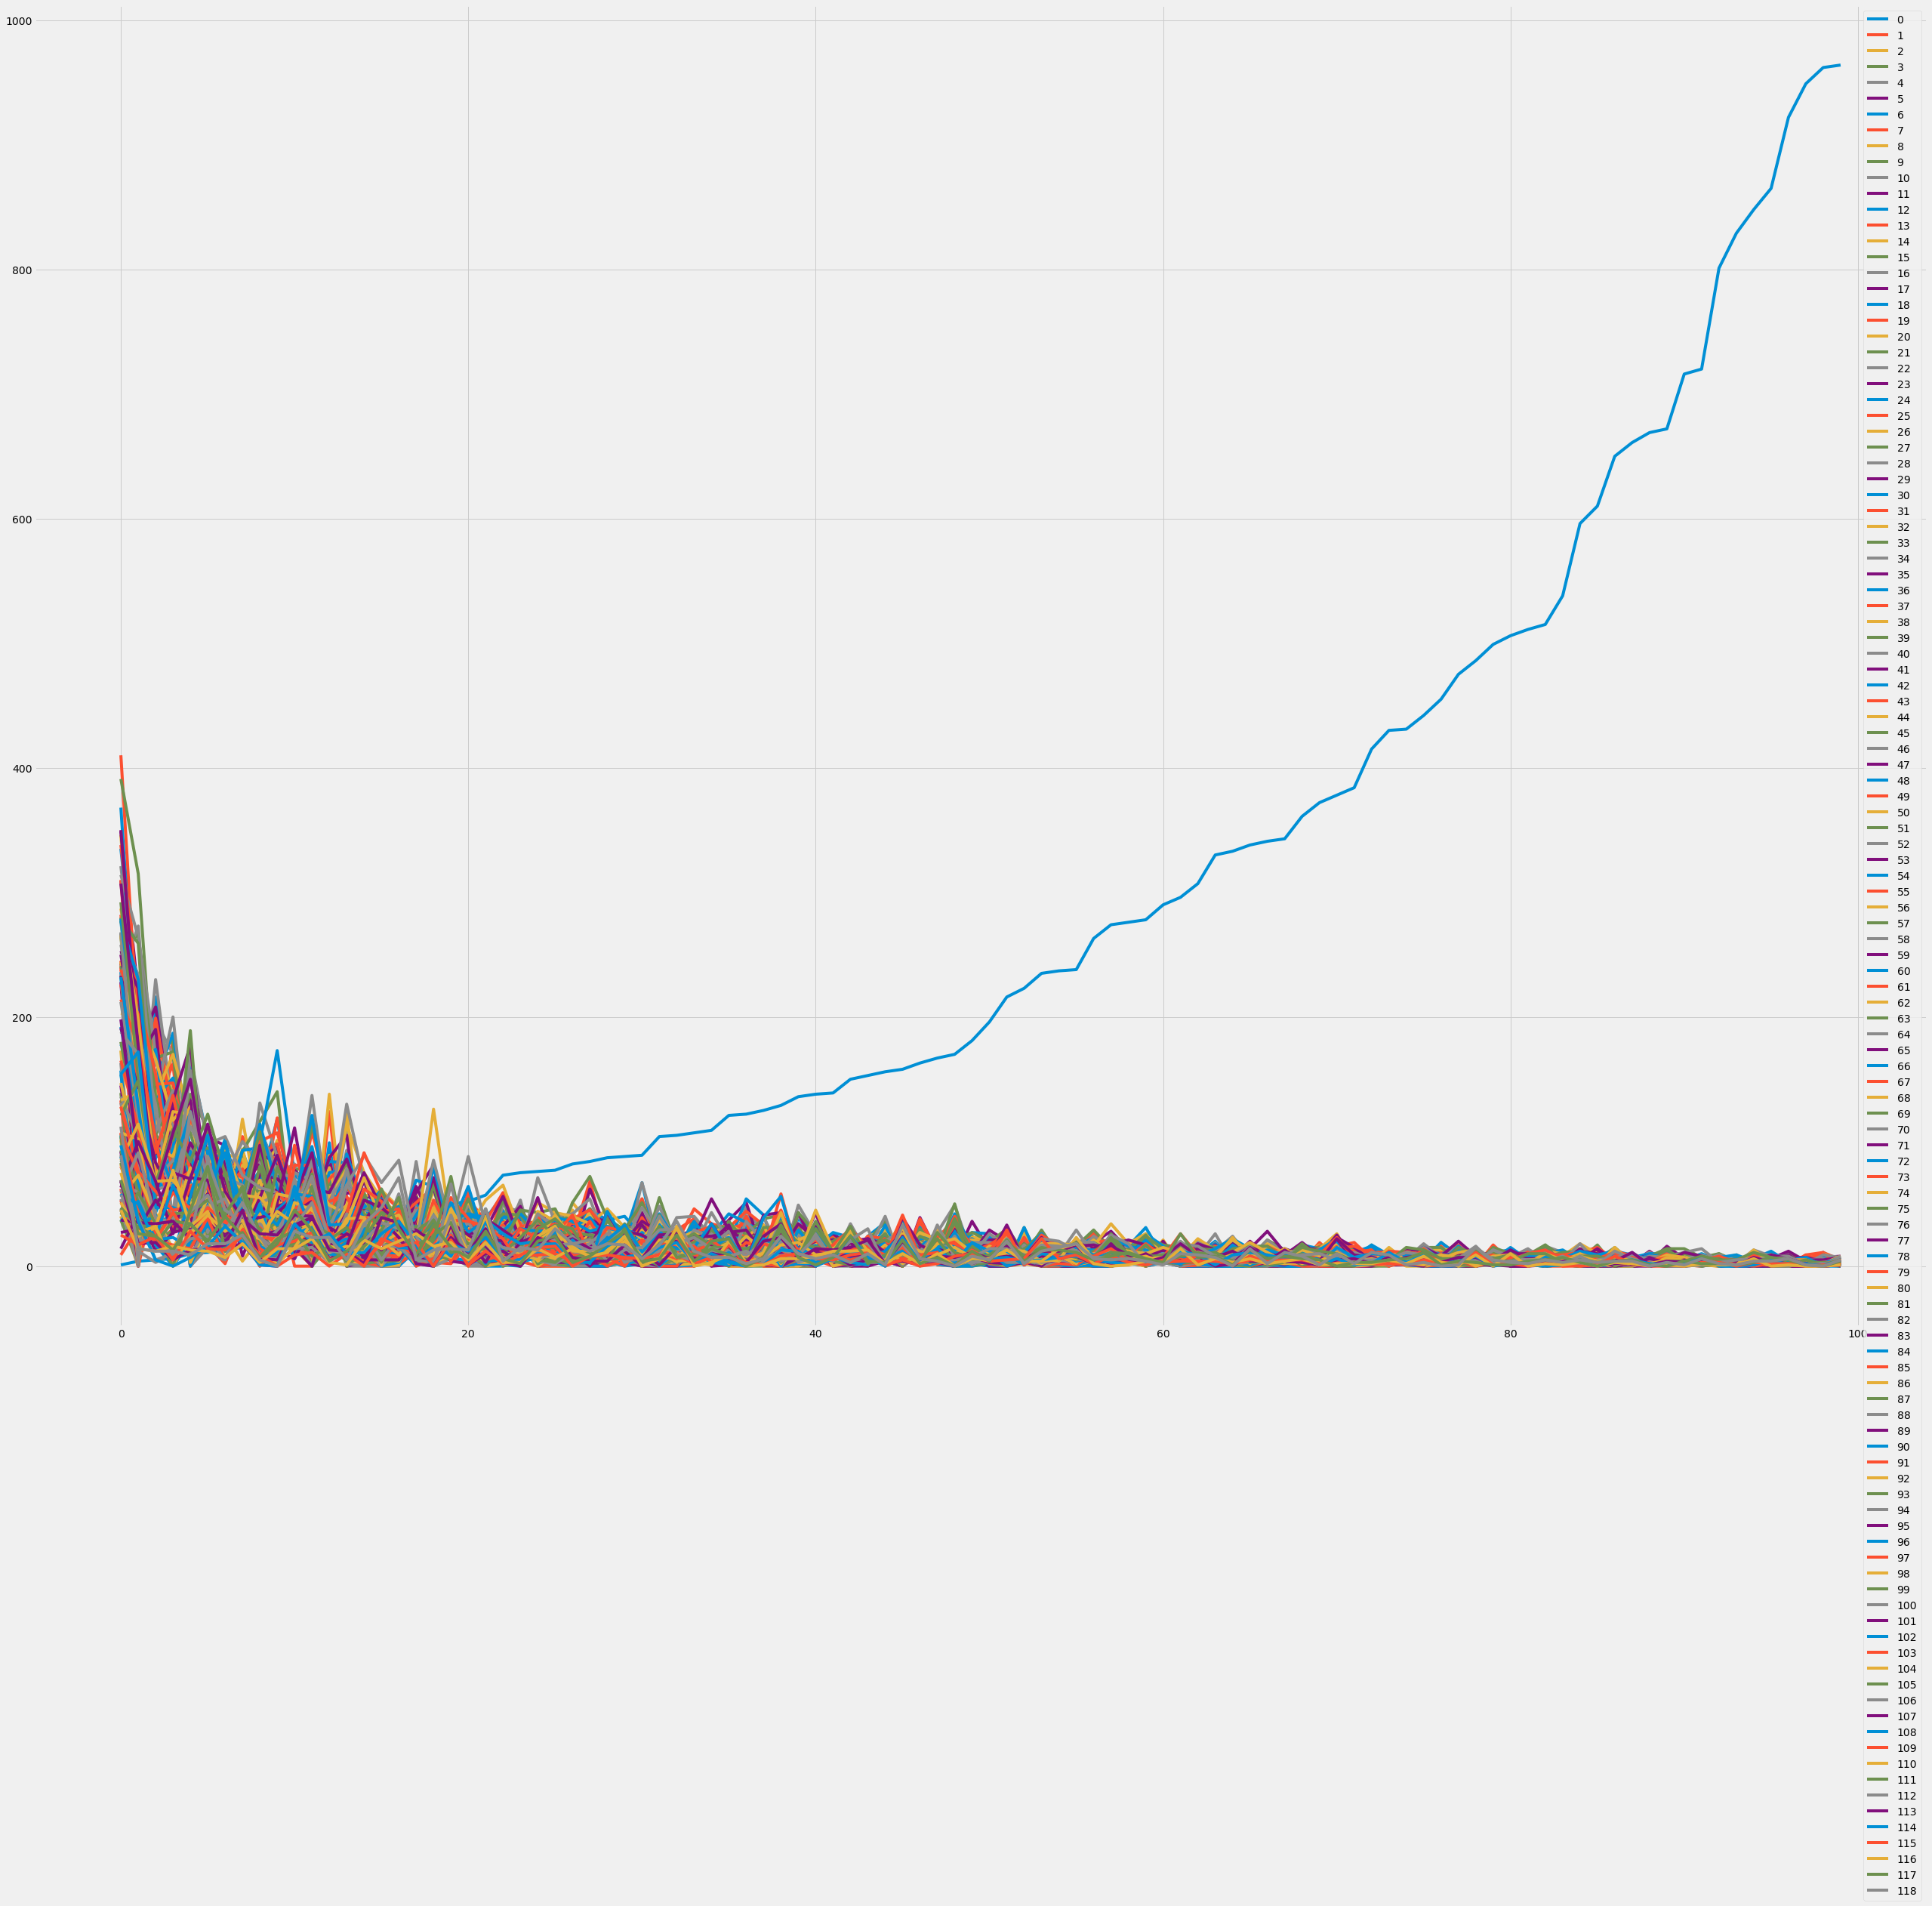

In [2]:
#----------read csv file----------
#info = pd.read_csv('distribution.csv')
product_distribution_training_set = pd.read_csv(r'C:\Users\DELL\Desktop\Project\final project\product_distribution_training_set.txt', sep='\t',header=None)
#set a dataframe for the data
data_pd = pd.DataFrame(data=product_distribution_training_set)
print(data_pd)
data_pd.plot()
pyplot.show()



          0        1      2        3       4        5        6         7   \
0          1  9882.56    0.0     0.00     0.0   193.00     0.00      0.00   
1          2   803.70  386.0   864.71     0.0     0.00  1000.72    318.00   
2          3  1358.93    0.0  1105.92     0.0  1172.36  7040.22  19619.27   
3          4    28.32    0.0     0.00     0.0     0.00     0.00    267.42   
4          5   772.00  150.0  4291.58     0.0     0.00   514.71   1411.58   
...      ...      ...    ...      ...     ...      ...      ...       ...   
30868  31486   276.89    0.0   485.28     0.0    72.40   553.04      0.00   
30869  31487     0.00    0.0   317.90     0.0   170.00   901.00    536.50   
30870  31488     0.00    0.0     0.00  6373.0     1.09  1705.03      0.00   
30871  31489   447.42    0.0   614.66     0.0     0.00   218.94    635.50   
30872  31490     0.00    0.0     0.00     0.0   345.20   174.46    110.00   

            8         9        10       11     12      13       14    15  


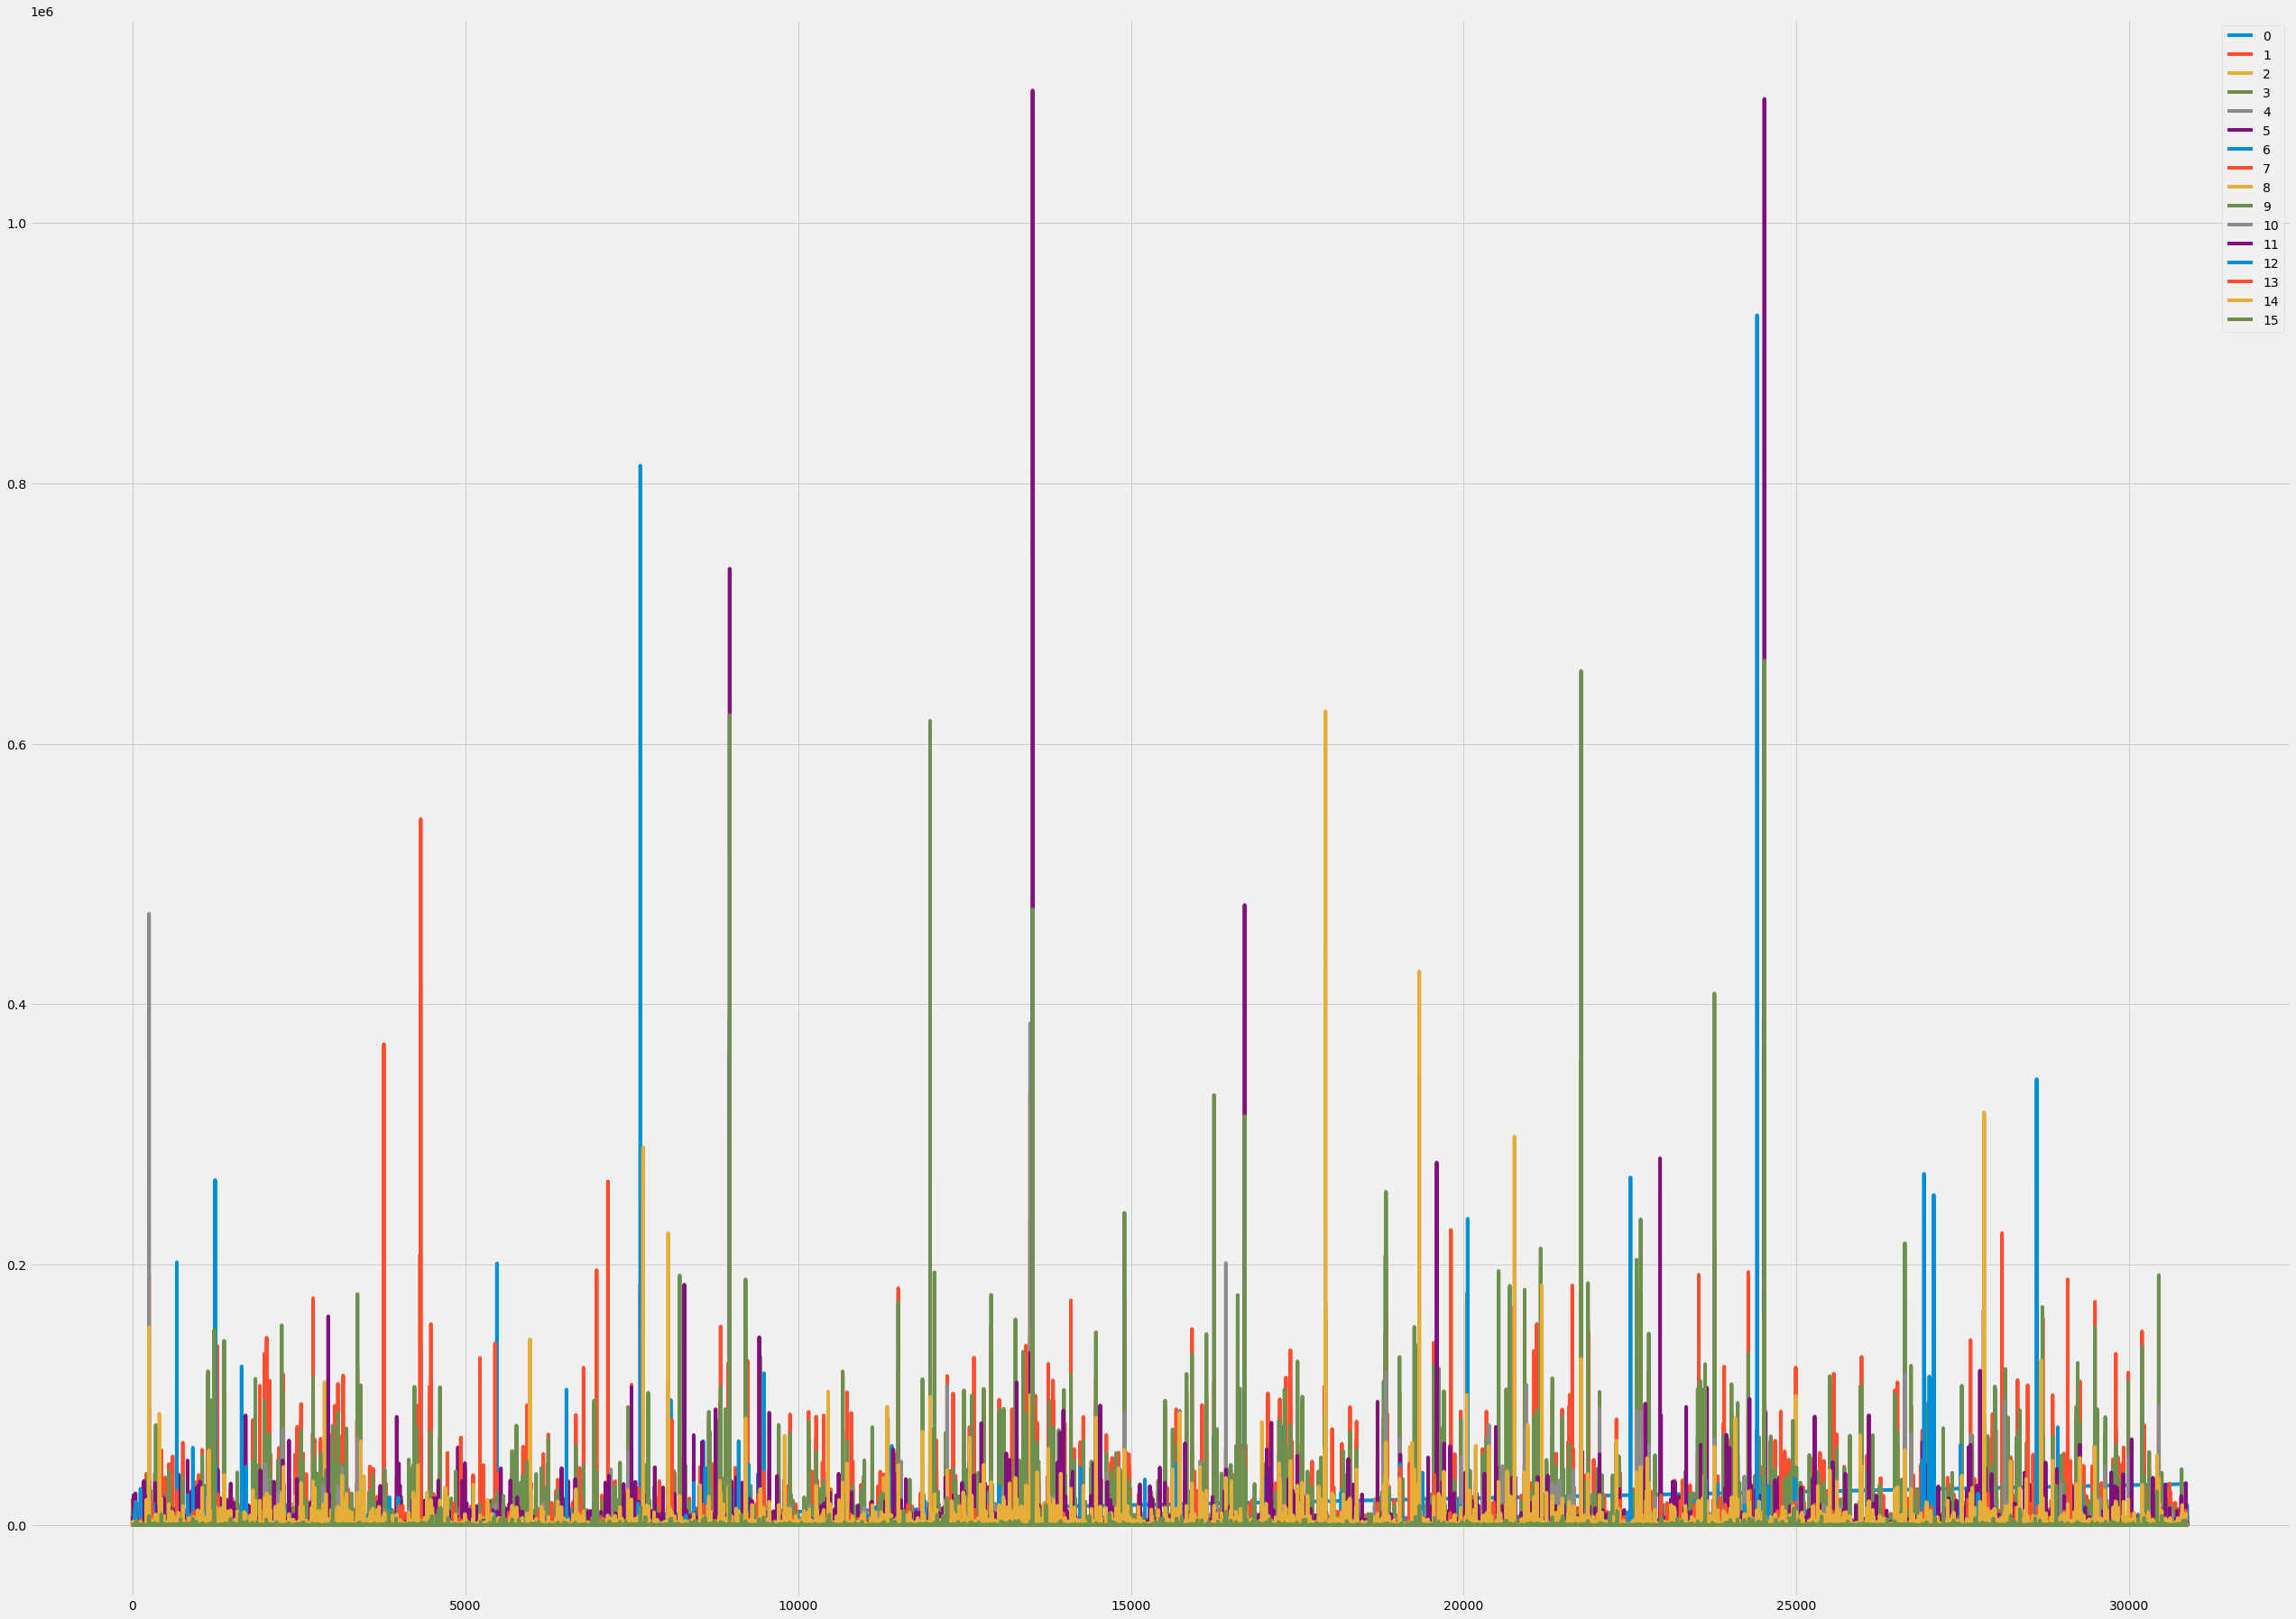

In [3]:
import pandas as pd
buyer_historical_category15_money = pd.read_csv(r'C:\Users\DELL\Desktop\Project\final project\buyer_historical_category15_money.txt', sep='\t',header=None)
#set a dataframe for the data
data = pd.DataFrame(data=buyer_historical_category15_money)
print(data)
data.plot()
pyplot.show()
data.columns = [str(col) + '_data' for col in data.columns]

       0_data   1_data  2_data   3_data  4_data   5_data   6_data    7_data  \
0           1  9882.56     0.0     0.00     0.0   193.00     0.00      0.00   
1           2   803.70   386.0   864.71     0.0     0.00  1000.72    318.00   
2           3  1358.93     0.0  1105.92     0.0  1172.36  7040.22  19619.27   
3           4    28.32     0.0     0.00     0.0     0.00     0.00    267.42   
4           5   772.00   150.0  4291.58     0.0     0.00   514.71   1411.58   
...       ...      ...     ...      ...     ...      ...      ...       ...   
30868   31486   276.89     0.0   485.28     0.0    72.40   553.04      0.00   
30869   31487     0.00     0.0   317.90     0.0   170.00   901.00    536.50   
30870   31488     0.00     0.0     0.00  6373.0     1.09  1705.03      0.00   
30871   31489   447.42     0.0   614.66     0.0     0.00   218.94    635.50   
30872   31490     0.00     0.0     0.00     0.0   345.20   174.46    110.00   

        8_data    9_data  10_data  11_data  12_data

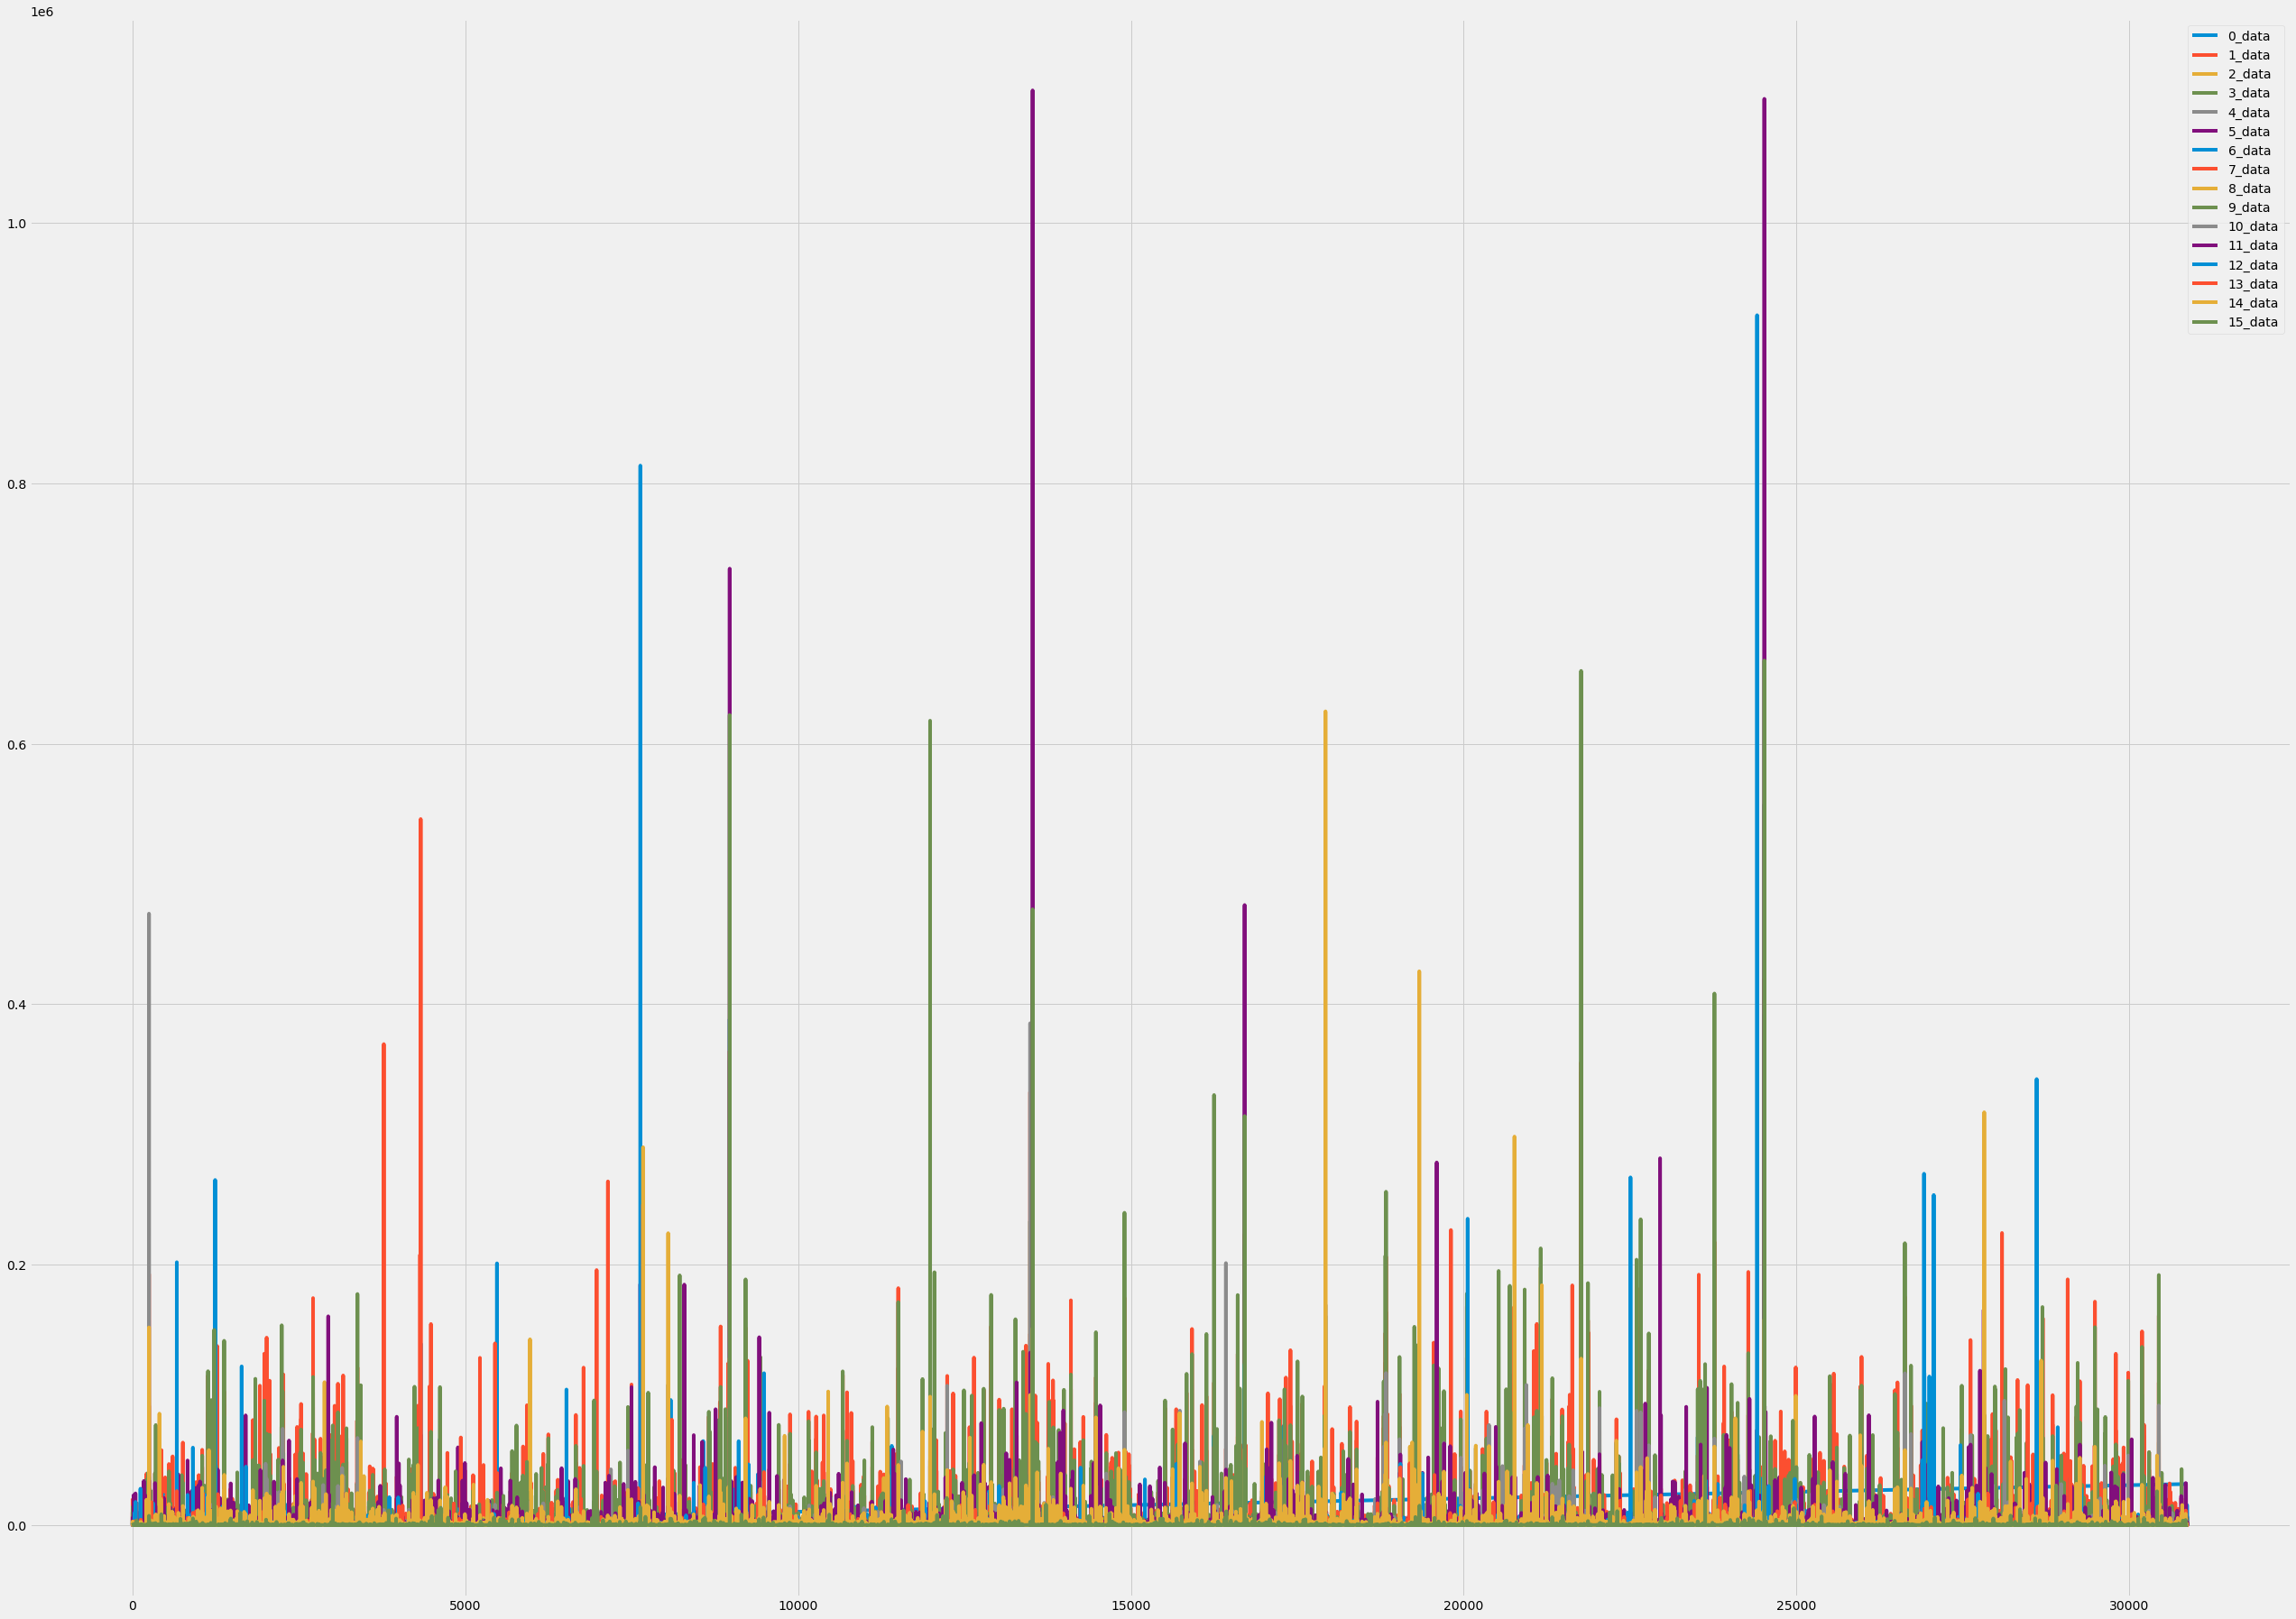

In [4]:
import pandas as pd
buyer_historical_category15_money = pd.read_csv(r'C:\Users\DELL\Desktop\Project\final project\buyer_historical_category15_money.txt', sep='\t',header=None)
#set a dataframe for the data
data2 = pd.DataFrame(data=buyer_historical_category15_money)
print(data)
data.plot()
pyplot.show()
data2.columns = [str(col) + '_data2' for col in data2.columns]
data3 = pd.concat([data,data2], axis=1, ignore_index= True)



In [5]:
data3

0        1      2        3       4        5        6         7   \
0          1  9882.56    0.0     0.00     0.0   193.00     0.00      0.00   
1          2   803.70  386.0   864.71     0.0     0.00  1000.72    318.00   
2          3  1358.93    0.0  1105.92     0.0  1172.36  7040.22  19619.27   
3          4    28.32    0.0     0.00     0.0     0.00     0.00    267.42   
4          5   772.00  150.0  4291.58     0.0     0.00   514.71   1411.58   
...      ...      ...    ...      ...     ...      ...      ...       ...   
30868  31486   276.89    0.0   485.28     0.0    72.40   553.04      0.00   
30869  31487     0.00    0.0   317.90     0.0   170.00   901.00    536.50   
30870  31488     0.00    0.0     0.00  6373.0     1.09  1705.03      0.00   
30871  31489   447.42    0.0   614.66     0.0     0.00   218.94    635.50   
30872  31490     0.00    0.0     0.00     0.0   345.20   174.46    110.00   

            8         9   ...       22        23       24        25       26  \
0         0.00    262.00  ...     0.00      0.00     0.00    262.00     0.00   
1       197.00    813.26  ...  1000.72    318.00   197.00    813.26   292.50   
2      5429.14  11919.19  ...  7040.22  19619.27  5429.14  11919.19  5489.23   
3         0.00     71.00  ...     0.00    267.42     0.00     71.00     0.00   
4       416.00    911.40  ...   514.71   1411.58   416.00    911.40   100.00   
...        ...       ...  ...      ...       ...      ...       ...      ...   
30868     0.00    311.00  ...   553.04      0.00     0.00    311.00    97.40   
30869   510.65    198.00  ...   901.00    536.50   510.65    198.00  2840.11   
30870     0.00     86.02  ...  1705.03      0.00     0.00     86.02   120.90   
30871   197.00   1758.73  ...   218.94    635.50   197.00   1758.73    69.00   
30872     0.00    145.00  ...   174.46    110.00     0.00    145.00     0.00   

            27     28      29       30    31  
0         0.00   0.00    0.00     0.00   0.0  
1         0.00   0.00    0.00     0.00  86.0  
2      5657.55  43.95  511.26  2699.70   0.0  
3         0.00   0.00    0.00    34.41   0.0  
4         0.00   0.00    0.00    35.26   0.0  
...        ...    ...     ...      ...   ...  
30868     0.00   0.00    0.00   278.08   0.0  
30869     0.00   0.00    0.00   259.89   0.0  
30870   710.00   0.00    0.00   131.40   0.0  
30871  1880.00   0.00  196.00     0.00   0.0  
30872     0.00   0.00  151.99     0.00   0.0  

[30873 rows x 32 columns]

In [6]:
import pandas as pd
import numpy as np

corr = data3.corr()
corr.style.background_gradient(cmap='coolwarm')

In [7]:
data= pd.read_csv(r'C:\Users\DELL\Desktop\Project\final project\product_distribution_training_set.txt',delimiter='\t',header=None)
print(data)
df=data.set_index(0)
#Preprocesssing
df1 = df.T
df2=df1.add_prefix('Product_ID_')
df2

    0    1    2    3    4    5    6    7    8    9    ...  109  110  111  112  \
0     1   53   40   37   45   69  105   62  101  104  ...    9   51   47   57   
1     4    0    0    2    4    0    8    0    6    3  ...   31   27   31   39   
2     5   57  133   60  126   90   87  107  120  182  ...   20   32   24    5   
3     6  108  130  143   92   88  101   66   75   89  ...   17    0    0   10   
4    10    0    0    2    0    4    0   36    3   37  ...   14   26   45   22   
..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
95  865    0    0    0    0    0    0    0    0    0  ...    3    3    7    6   
96  922    0    0    0    0    0    0    1    0    0  ...    2    6    2    7   
97  949    0    1    2    1    3    7    5    2    2  ...    1    0    5    1   
98  962    1    4    2    2    1    4    3    3    2  ...    0    0    1    2   
99  964    0    1    0    0    1    1    1    2    2  ...    1    4    5    1   

    113  114  115  116  117

0    Product_ID_1  Product_ID_4  Product_ID_5  Product_ID_6  Product_ID_10  \
1              53             0            57           108              0   
2              40             0           133           130              0   
3              37             2            60           143              2   
4              45             4           126            92              0   
5              69             0            90            88              4   
..            ...           ...           ...           ...            ...   
114            97            36             5             0              7   
115            25            17            24             5             28   
116            45            14            12            16             13   
117            69            26            24            13             34   
118            89            14            12            12              9   

0    Product_ID_11  Product_ID_13  Product_ID_15  Product_ID_18  \
1               17              2             38             43   
2               22             31             54             40   
3               16             13             38             52   
4               15              4             45             55   
5               45             18             50             72   
..             ...            ...            ...            ...   
114             16             32             19              1   
115             14             13             24              9   
116             12              7             18              3   
117             20             40             24              7   
118             18             18             25              5   

0    Product_ID_19  ...  Product_ID_716  Product_ID_720  Product_ID_801  \
1               62  ...               0               1               2   
2               70  ...               1               1               0   
3               75  ...               3               3               2   
4               68  ...               0               1               2   
5               41  ...               0               4               6   
..             ...  ...             ...             ...             ...   
114              0  ...               2               6               0   
115              0  ...               0               3               3   
116             14  ...               0               2               1   
117             18  ...               4               2               2   
118              0  ...               1               6               2   

0    Product_ID_829  Product_ID_848  Product_ID_865  Product_ID_922  \
1                 2               0               0               0   
2                 5               0               0               0   
3                 7               0               0               0   
4                 0               0               0               0   
5                 0               0               0               0   
..              ...             ...             ...             ...   
114               0               1               5               1   
115               0               3               2               2   
116               1               6               0               1   
117               1               3               7               5   
118               1               4               4               6   

0    Product_ID_949  Product_ID_962  Product_ID_964  
1                 0               1               0  
2                 1               4               1  
3                 2               2               0  
4                 1               2               0  
5                 3               1               1  
..              ...             ...             ...  
114               1               1               4  
115               0               1               2  
116               

#There is correlation between the quantity and money for various product categories, but there is enough evidence to map which product ID. So,performing Univariate Analysis for Forecasting


In [8]:

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pylab
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import math
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm


In [9]:
#importing Data
data= pd.read_csv(r'C:\Users\DELL\Desktop\Project\final project\product_distribution_training_set.txt',delimiter='\t',header=None)
df=data.set_index(0)
#Preprocesssing
df1 = data.T
new_head = df1.iloc[0]
# Make the new_header as the column header
df1.columns = new_head
df1 = df1.drop(df1.index[[0]])
print(df1)
df2=df1.add_prefix('Product_ID_')
df2

0    1    4    5    6    10   11   13   15   18   19   ...  716  720  801  \
1     53    0   57  108    0   17    2   38   43   62  ...    0    1    2   
2     40    0  133  130    0   22   31   54   40   70  ...    1    1    0   
3     37    2   60  143    2   16   13   38   52   75  ...    3    3    2   
4     45    4  126   92    0   15    4   45   55   68  ...    0    1    2   
5     69    0   90   88    4   45   18   50   72   41  ...    0    4    6   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
114   97   36    5    0    7   16   32   19    1    0  ...    2    6    0   
115   25   17   24    5   28   14   13   24    9    0  ...    0    3    3   
116   45   14   12   16   13   12    7   18    3   14  ...    0    2    1   
117   69   26   24   13   34   20   40   24    7   18  ...    4    2    2   
118   89   14   12   12    9   18   18   25    5    0  ...    1    6    2   

0    829  848  865  922  949  962  964  
1      2    0    0    0    0    1 

0    Product_ID_1  Product_ID_4  Product_ID_5  Product_ID_6  Product_ID_10  \
1              53             0            57           108              0   
2              40             0           133           130              0   
3              37             2            60           143              2   
4              45             4           126            92              0   
5              69             0            90            88              4   
..            ...           ...           ...           ...            ...   
114            97            36             5             0              7   
115            25            17            24             5             28   
116            45            14            12            16             13   
117            69            26            24            13             34   
118            89            14            12            12              9   

0    Product_ID_11  Product_ID_13  Product_ID_15  Product_ID_18  \
1               17              2             38             43   
2               22             31             54             40   
3               16             13             38             52   
4               15              4             45             55   
5               45             18             50             72   
..             ...            ...            ...            ...   
114             16             32             19              1   
115             14             13             24              9   
116             12              7             18              3   
117             20             40             24              7   
118             18             18             25              5   

0    Product_ID_19  ...  Product_ID_716  Product_ID_720  Product_ID_801  \
1               62  ...               0               1               2   
2               70  ...               1               1               0   
3               75  ...               3               3               2   
4               68  ...               0               1               2   
5               41  ...               0               4               6   
..             ...  ...             ...             ...             ...   
114              0  ...               2               6               0   
115              0  ...               0               3               3   
116             14  ...               0               2               1   
117             18  ...               4               2               2   
118              0  ...               1               6               2   

0    Product_ID_829  Product_ID_848  Product_ID_865  Product_ID_922  \
1                 2               0               0               0   
2                 5               0               0               0   
3                 7               0               0               0   
4                 0               0               0               0   
5                 0               0               0               0   
..              ...             ...             ...             ...   
114               0               1               5               1   
115               0               3               2               2   
116               1               6               0               1   
117               1               3               7               5   
118               1               4               4               6   

0    Product_ID_949  Product_ID_962  Product_ID_964  
1                 0               1               0  
2                 1               4               1  
3                 2               2               0  
4                 1               2               0  
5                 3               1               1  
..              ...             ...             ...  
114               1               1               4  
115               0               1               2  
116               

0   Product_ID_1  Product_ID_4  Product_ID_5  Product_ID_6  Product_ID_10  \
0            349            14           553           662              6   
1            695            16           860           669            159   
2           1166           266          1045           722            216   
3           1489           530          1090           974            220   
4           1597           904          1262           850            274   
5           2071          1162          1096          1008            416   
6           2294          1482          1003           760            727   
7           1816          1453           861           755            761   
8           1619          1358           468           583            692   
9           1857          1212           577           659            995   
10          1589          1018           423           421            760   
11          1318           923           279           361            605   

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
      

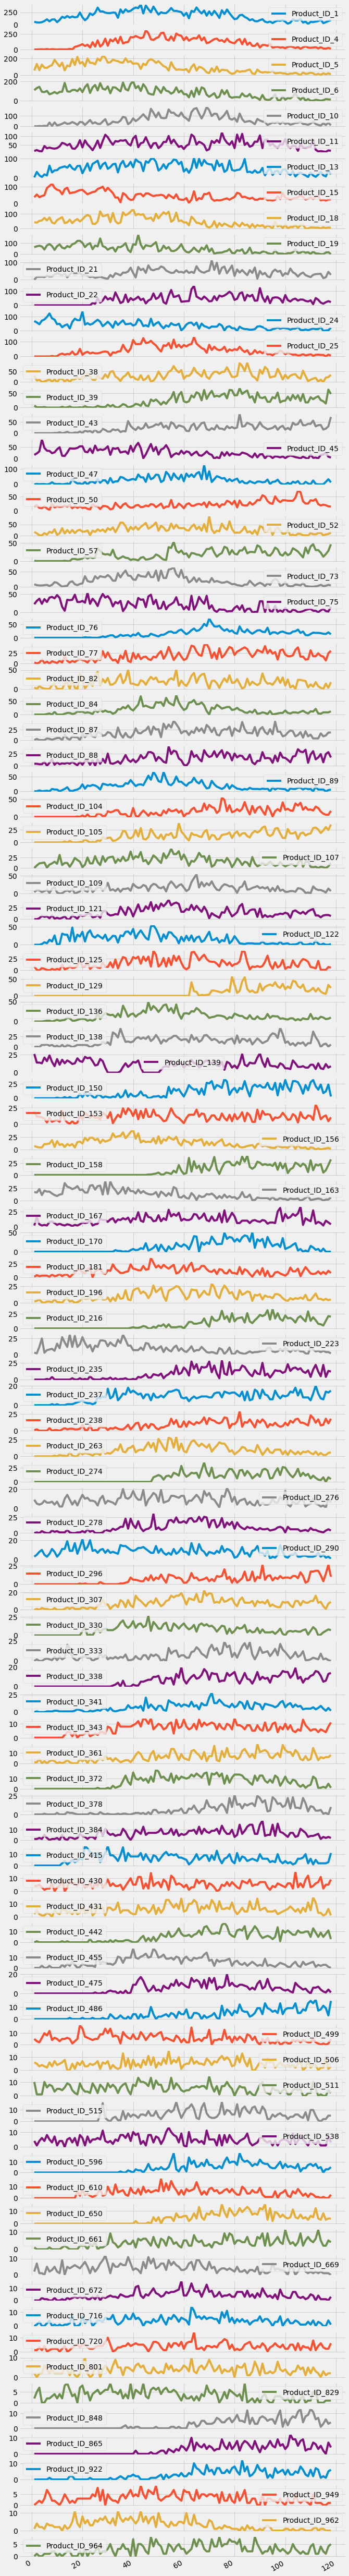

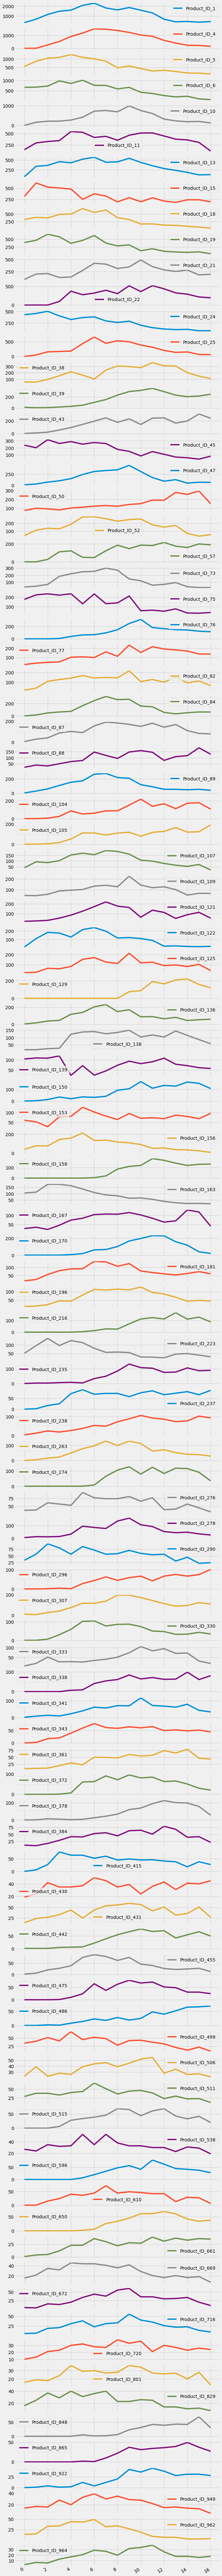

In [10]:
df3=df2.plot(subplots=True,figsize=(10,100))
df4=df2.groupby(df2.index // 7).sum()
print(df4)
df4.plot(subplots=True,figsize=(10,160))




In [11]:
#function to check Stationarity with adfuller test
def isdatastationary(series):
    pValue = adfuller(series)[1]
    if pValue > 0.05:
        return False
    else:
        return True
#function to check stationarity with Mean, Variance check
def isdatastationaryAvg(series, delta = 2):
    split = int(len(series)/2)
    split1, split2 = series[:split], series[split:]
    avg1, avg2 = split1.mean(), split2.mean()
    var1, var2 = split1.var(), split2.var()
    if abs(avg1 - avg2) > delta or abs(var1 - var2) > delta**2:
        return False
    else:
        return True

In [12]:
cols=df2.columns.values
print(cols)

Total= df2.sum(axis=1).astype(float)
print(Total)
Total_train=Total[0:100]
Total_test=Total[100:118]
model3= pm.auto_arima(Total_train,seasonal=True,m=7,start_p=0,start_q=0,start_d=1,max_p=3,max_q=3,max_d=3,start_P=0,start_Q=0,start_D=0
            ,suppress_warings=True,stepwise=True,trace=True)
model4=model3.predict(n_periods=18)
print(model4)
#refitting model on Total sum 
model_total=pm.auto_arima(Total,seasonal=True,m=7,start_p=0,start_q=0,start_d=1,max_p=3,max_q=3,max_d=3,start_P=0,start_Q=0,start_D=0
            ,suppress_warings=True,stepwise=True,trace=True)
Total_predict=model_total.predict(n_periods=29)
print(Total_predict)
w = '0  '
file = open('Predicted.txt','w+')
for i in Total_predict:
    i = int(round(i))
    w += str(i) + '  '
file.write(w)
file.write('\n\n')
    





['Product_ID_1' 'Product_ID_4' 'Product_ID_5' 'Product_ID_6'
 'Product_ID_10' 'Product_ID_11' 'Product_ID_13' 'Product_ID_15'
 'Product_ID_18' 'Product_ID_19' 'Product_ID_21' 'Product_ID_22'
 'Product_ID_24' 'Product_ID_25' 'Product_ID_38' 'Product_ID_39'
 'Product_ID_43' 'Product_ID_45' 'Product_ID_47' 'Product_ID_50'
 'Product_ID_52' 'Product_ID_57' 'Product_ID_73' 'Product_ID_75'
 'Product_ID_76' 'Product_ID_77' 'Product_ID_82' 'Product_ID_84'
 'Product_ID_87' 'Product_ID_88' 'Product_ID_89' 'Product_ID_104'
 'Product_ID_105' 'Product_ID_107' 'Product_ID_109' 'Product_ID_121'
 'Product_ID_122' 'Product_ID_125' 'Product_ID_129' 'Product_ID_136'
 'Product_ID_138' 'Product_ID_139' 'Product_ID_150' 'Product_ID_153'
 'Product_ID_156' 'Product_ID_158' 'Product_ID_163' 'Product_ID_167'
 'Product_ID_170' 'Product_ID_181' 'Product_ID_196' 'Product_ID_216'
 'Product_ID_223' 'Product_ID_235' 'Product_ID_237' 'Product_ID_238'
 'Product_ID_263' 'Product_ID_274' 'Product_ID_276' 'Product_ID_278'


 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=1624.282, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=1634.483, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=1635.822, Time=0.05 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=1616.751, Time=0.15 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=1613.685, Time=0.49 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=1611.906, Time=0.30 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=1625.512, Time=0.09 sec
 ARIMA(1,1,0)(1,0,2)[7] intercept   : AIC=1613.510, Time=0.45 sec
 ARIMA(1,1,0)(0,0,2)[7] intercept   : AIC=1619.258, Time=0.15 sec
 ARIMA(1,1,0)(2,0,2)[7] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=1612.565, Time=0.18 sec
 ARIMA(2,1,0)(1,0,1)[7] intercept   : AIC=1610.721, Time=0.31 sec
 ARIMA(2,1,0)(0,0,1)[7] intercept   : AIC=1624.708, Time=0.11 sec
 ARIMA(2,1,0)(1,0,0)[7] intercept   : AIC=1617.863, Time=0.16 sec
 ARIMA(2,1,0)(2,0,1)[7] intercept   : AIC=1614.608, Time=0.59 sec
 ARIMA(2,1,0)(1

2

In [14]:
start=0
import random
for product_id in cols:
    isdatastationaryAvg(Total.values)
    isdatastationary(Total.values)
    isdatastationaryAvg(df2[product_id])
    isdatastationary(df2[product_id])
    series = Total.values

    train_data=df2[product_id][0:100]
    test_data=df2[product_id][100:118]
    #Using Auto-Arima model for Forecasting
    #Fitting model on training Data set
    model= pm.auto_arima(train_data,seasonal=True,m=7,start_p=0,start_q=0,start_d=1,max_p=3,max_q=3,max_d=3,start_P=1,start_Q=0,start_D=0,suppress_warings=True,stepwise=True,trace=True)
    #Predicting on test Data set
    forecast = model.predict(len(test_data))


    #plt.plot(test_data.values, color='green', label = "Test")
    #plt.plot(forecast, color='red', label = "Prediction")
    #print(forecast)
    #plt.legend()

    
    rms=sqrt(mean_squared_error(test_data, forecast))
    print(rms)

    #Fittingthe whole data to forecast future Demand
    model2= pm.auto_arima(df2[product_id],seasonal=True,m=7,start_p=0,start_q=0,start_d=1,max_p=3,max_q=3,max_d=3,start_P=0,start_Q=0,start_D=0
            ,suppress_warings=True,stepwise=True,trace=True)
    

    #Forecasting for Demand for next 29 Days
    forecast1=model2.predict(n_periods=29)
   

    #print("Forecasting",foreCast)
    pred=[]
    Prediction = forecast1
    for i in Prediction:
        if i<1:
            i=random.choice([0,1])
            pred.append(i)
        else:
            i==i
            pred.append(i)
    pred
    pred_final=[]
    for i in pred:
        pred_final1=random.choice([math.ceil(i),math.floor(i)])
        pred_final.append(pred_final1)    
    #print(pred_final)
    
    
    k= str(new_head[start]) + ' '
    start+=1
    for i in pred_final:
        k+= str(i) + '  '
    file.write(k)
    file.write('\n\n')
    
    

    

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=1113.731, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=1114.385, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=1084.585, Time=0.08 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=1081.380, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=1112.385, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=1081.296, Time=0.05 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=1081.139, Time=0.10 sec
 ARIMA(0,1,1)(2,0,0)[7] intercept   : AIC=1083.001, Time=0.18 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=1083.089, Time=0.18 sec
 ARIMA(0,1,1)(2,0,1)[7] intercept   : AIC=1083.658, Time=0.38 sec
 ARIMA(1,1,1)(1,0,0)[7] intercept   : AIC=1082.664, Time=0.15 sec
 ARIMA(0,1,2)(1,0,0)[7] intercept   : AIC=1082.901, Time=0.17 sec
 ARIMA(1,1,2)(1,0,0)[7] intercept   : AIC=1084.350, Time=0.23 sec
 ARIMA(0,1,1)(1,0,0)[7]             : AIC=1079.150, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[7]          

 ARIMA(2,1,3)(0,0,0)[7] intercept   : AIC=980.184, Time=0.30 sec
 ARIMA(1,1,2)(0,0,0)[7]             : AIC=975.326, Time=0.07 sec
 ARIMA(1,1,2)(1,0,0)[7]             : AIC=977.262, Time=0.11 sec
 ARIMA(1,1,2)(0,0,1)[7]             : AIC=977.256, Time=0.12 sec
 ARIMA(1,1,2)(1,0,1)[7]             : AIC=inf, Time=0.37 sec
 ARIMA(0,1,2)(0,0,0)[7]             : AIC=978.448, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[7]             : AIC=978.170, Time=0.04 sec
 ARIMA(2,1,2)(0,0,0)[7]             : AIC=976.837, Time=0.12 sec
 ARIMA(1,1,3)(0,0,0)[7]             : AIC=977.060, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[7]             : AIC=976.800, Time=0.03 sec
 ARIMA(0,1,3)(0,0,0)[7]             : AIC=976.914, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[7]             : AIC=976.626, Time=0.08 sec
 ARIMA(2,1,3)(0,0,0)[7]             : AIC=978.763, Time=0.16 sec

Best model:  ARIMA(1,1,2)(0,0,0)[7]          
Total fit time: 4.031 seconds
11.860947542950006
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)

 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=1136.693, Time=0.13 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=1112.619, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=1141.574, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=1114.731, Time=0.05 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=1112.841, Time=0.20 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : AIC=1114.263, Time=0.17 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=1112.171, Time=0.09 sec
 ARIMA(0,1,1)(2,0,0)[7] intercept   : AIC=1113.916, Time=0.16 sec
 ARIMA(0,1,1)(2,0,1)[7] intercept   : AIC=1114.531, Time=0.32 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=1140.778, Time=0.06 sec
 ARIMA(1,1,1)(1,0,0)[7] intercept   : AIC=1110.030, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=1113.709, Time=0.10 sec
 ARIMA(1,1,1)(2,0,0)[7] intercept   : AIC=1111.725, Time=0.27 sec
 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=1111.137, Time=0.23 sec
 ARIMA(1,1,1)(0,0,1)[7] intercept   : AIC=1110.708, Time=0.15 sec
 ARIMA(1,1

 ARIMA(1,0,1)(0,0,2)[7] intercept   : AIC=905.159, Time=0.43 sec
 ARIMA(1,0,1)(1,0,0)[7] intercept   : AIC=903.197, Time=0.28 sec
 ARIMA(1,0,1)(1,0,2)[7] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(1,0,2)(0,0,1)[7] intercept   : AIC=904.968, Time=0.32 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=922.244, Time=0.08 sec
 ARIMA(0,0,2)(0,0,1)[7] intercept   : AIC=911.123, Time=0.17 sec
 ARIMA(2,0,2)(0,0,1)[7] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(1,0,1)(0,0,1)[7]             : AIC=903.941, Time=0.13 sec

Best model:  ARIMA(1,0,1)(0,0,1)[7] intercept
Total fit time: 9.172 seconds
25.604120743278415
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=1098.438, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=1065.535, Time=0.12 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=1042.328, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=1096.441, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=1044.124, Time=0.04 sec
 ARIMA(0,1,1)(1,0,1

 ARIMA(1,1,2)(0,0,0)[7]             : AIC=1048.967, Time=0.09 sec

Best model:  ARIMA(0,1,1)(0,0,0)[7]          
Total fit time: 1.637 seconds
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=966.576, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=964.886, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=955.369, Time=0.09 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=930.581, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=962.926, Time=0.00 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=928.669, Time=0.05 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=930.613, Time=0.07 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=931.370, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=927.142, Time=0.10 sec
 ARIMA(1,1,1)(1,0,0)[7] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(1,1,1)(0,0,1)[7] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=953.

 ARIMA(3,1,2)(0,0,0)[7] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[7]             : AIC=919.534, Time=0.07 sec
 ARIMA(2,1,1)(1,0,0)[7]             : AIC=920.628, Time=0.12 sec
 ARIMA(2,1,1)(0,0,1)[7]             : AIC=920.719, Time=0.11 sec
 ARIMA(2,1,1)(1,0,1)[7]             : AIC=921.146, Time=0.23 sec
 ARIMA(1,1,1)(0,0,0)[7]             : AIC=920.715, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[7]             : AIC=931.351, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[7]             : AIC=921.366, Time=0.08 sec
 ARIMA(2,1,2)(0,0,0)[7]             : AIC=inf, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[7]             : AIC=946.725, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[7]             : AIC=inf, Time=0.14 sec
 ARIMA(3,1,0)(0,0,0)[7]             : AIC=929.021, Time=0.04 sec
 ARIMA(3,1,2)(0,0,0)[7]             : AIC=inf, Time=0.27 sec

Best model:  ARIMA(2,1,1)(0,0,0)[7]          
Total fit time: 4.713 seconds
22.926085503237633
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[7] intercep

 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=862.921, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[7] intercept   : AIC=862.989, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=865.490, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[7] intercept   : AIC=855.562, Time=0.15 sec
 ARIMA(1,1,2)(1,0,0)[7] intercept   : AIC=857.024, Time=0.27 sec
 ARIMA(1,1,2)(0,0,1)[7] intercept   : AIC=856.781, Time=0.28 sec
 ARIMA(1,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(2,1,2)(0,0,0)[7] intercept   : AIC=856.282, Time=0.14 sec
 ARIMA(1,1,3)(0,0,0)[7] intercept   : AIC=855.791, Time=0.14 sec
 ARIMA(0,1,3)(0,0,0)[7] intercept   : AIC=864.342, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[7] intercept   : AIC=864.026, Time=0.10 sec
 ARIMA(2,1,3)(0,0,0)[7] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(1,1,2)(0,0,0)[7]             : AIC=853.631, Time=0.12 sec
 ARIMA(1,1,2)(1,0,0)[7]             : AIC=855.083, Time=0.20 sec
 ARIMA(1,1,2)(0,0,1)[7]             : AIC=854.836, Time=0.17 sec
 ARIMA(1,1,2)(1,0,1)[7]          

 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=747.206, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=794.799, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=749.962, Time=0.05 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=748.696, Time=0.09 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : AIC=748.901, Time=0.10 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=746.783, Time=0.06 sec
 ARIMA(0,1,1)(2,0,0)[7] intercept   : AIC=748.687, Time=0.12 sec
 ARIMA(0,1,1)(2,0,1)[7] intercept   : AIC=750.686, Time=0.20 sec
 ARIMA(1,1,1)(1,0,0)[7] intercept   : AIC=748.194, Time=0.07 sec
 ARIMA(0,1,2)(1,0,0)[7] intercept   : AIC=748.144, Time=0.08 sec
 ARIMA(1,1,2)(1,0,0)[7] intercept   : AIC=750.131, Time=0.18 sec
 ARIMA(0,1,1)(1,0,0)[7]             : AIC=745.386, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[7]             : AIC=748.899, Time=0.02 sec
 ARIMA(0,1,1)(2,0,0)[7]             : AIC=747.187, Time=0.05 sec
 ARIMA(0,1,1)(1,0,1)[7]             : AIC=747.196, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[7]  

 ARIMA(1,1,2)(0,0,0)[7] intercept   : AIC=939.731, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[7] intercept   : AIC=937.829, Time=0.10 sec
 ARIMA(0,1,2)(1,0,0)[7] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,2)(0,0,1)[7] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,1,3)(0,0,0)[7] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(1,1,3)(0,0,0)[7] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,1,2)(0,0,0)[7]             : AIC=938.922, Time=0.03 sec

Best model:  ARIMA(0,1,2)(0,0,0)[7] intercept
Total fit time: 3.510 seconds
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=920.942, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=924.713, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=865.385, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=852.538, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=922.713, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=858.390, Time

 ARIMA(1,1,3)(2,0,0)[7]             : AIC=853.347, Time=0.34 sec
 ARIMA(0,1,2)(2,0,0)[7] intercept   : AIC=852.313, Time=0.14 sec

Best model:  ARIMA(0,1,2)(2,0,0)[7]          
Total fit time: 3.009 seconds
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=874.170, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=872.474, Time=0.00 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=842.495, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=816.557, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=870.475, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=815.083, Time=0.03 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=816.542, Time=0.06 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=817.103, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=816.418, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[7] intercept   : AIC=816.394, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=840.831, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[7] intercept  

 ARIMA(2,1,0)(1,0,1)[7]             : AIC=850.633, Time=0.20 sec
 ARIMA(2,1,2)(1,0,1)[7]             : AIC=840.220, Time=0.37 sec

Best model:  ARIMA(1,1,1)(1,0,1)[7]          
Total fit time: 7.948 seconds
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=801.048, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=834.181, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=764.502, Time=0.09 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=780.282, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=940.156, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=765.457, Time=0.04 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=764.380, Time=0.25 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=766.432, Time=0.34 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=763.857, Time=0.24 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=763.289, Time=0.11 sec
 ARIMA(1,0,0)(0,0,2)[7] intercept   : AIC=763.835, Time=0.19 sec
 ARIMA(1,0,0)(1,0,2)[7] intercept  

 ARIMA(0,1,0)(2,0,0)[7] intercept   : AIC=955.931, Time=0.09 sec
 ARIMA(2,1,0)(2,0,0)[7] intercept   : AIC=920.198, Time=0.19 sec
 ARIMA(2,1,0)(1,0,0)[7] intercept   : AIC=920.785, Time=0.14 sec
 ARIMA(2,1,0)(2,0,1)[7] intercept   : AIC=921.254, Time=0.33 sec
 ARIMA(2,1,0)(1,0,1)[7] intercept   : AIC=920.699, Time=0.26 sec
 ARIMA(3,1,0)(2,0,0)[7] intercept   : AIC=921.555, Time=0.25 sec
 ARIMA(2,1,1)(2,0,0)[7] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(1,1,1)(2,0,0)[7] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(3,1,1)(2,0,0)[7] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(2,1,0)(2,0,0)[7]             : AIC=918.252, Time=0.12 sec
 ARIMA(2,1,0)(1,0,0)[7]             : AIC=918.888, Time=0.06 sec
 ARIMA(2,1,0)(2,0,1)[7]             : AIC=919.315, Time=0.26 sec
 ARIMA(2,1,0)(1,0,1)[7]             : AIC=918.795, Time=0.14 sec
 ARIMA(1,1,0)(2,0,0)[7]             : AIC=926.563, Time=0.28 sec
 ARIMA(3,1,0)(2,0,0)[7]             : AIC=919.624, Time=0.13 sec
 ARIMA(2,1,1)(2,0,0)[7]             :

 ARIMA(1,1,0)(2,0,0)[7]             : AIC=877.044, Time=0.07 sec
 ARIMA(1,1,2)(2,0,0)[7]             : AIC=845.929, Time=0.19 sec

Best model:  ARIMA(0,1,1)(2,0,0)[7]          
Total fit time: 3.469 seconds
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=821.063, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=819.104, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=806.597, Time=0.08 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=773.522, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=817.105, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=772.009, Time=0.05 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=773.509, Time=0.06 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=775.509, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=773.525, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[7] intercept   : AIC=773.300, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=805.335, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[7] intercept  

 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=728.476, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[7] intercept   : AIC=712.062, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[7]             : AIC=708.151, Time=0.02 sec
 ARIMA(0,1,1)(1,0,0)[7]             : AIC=710.143, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[7]             : AIC=710.144, Time=0.06 sec
 ARIMA(0,1,1)(1,0,1)[7]             : AIC=inf, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[7]             : AIC=709.696, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[7]             : AIC=709.746, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[7]             : AIC=726.500, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[7]             : AIC=711.220, Time=0.06 sec

Best model:  ARIMA(0,1,1)(0,0,0)[7]          
Total fit time: 1.343 seconds
8.303888931704826
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=890.510, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=852.851, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=831.735, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[

 ARIMA(0,1,2)(0,0,1)[7] intercept   : AIC=841.697, Time=0.18 sec
 ARIMA(0,1,2)(1,0,1)[7] intercept   : AIC=843.601, Time=0.35 sec
 ARIMA(0,1,3)(0,0,0)[7] intercept   : AIC=841.942, Time=0.09 sec
 ARIMA(1,1,3)(0,0,0)[7] intercept   : AIC=844.057, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[7]             : AIC=838.133, Time=0.05 sec
 ARIMA(0,1,2)(1,0,0)[7]             : AIC=839.668, Time=0.08 sec
 ARIMA(0,1,2)(0,0,1)[7]             : AIC=839.717, Time=0.09 sec
 ARIMA(0,1,2)(1,0,1)[7]             : AIC=841.621, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[7]             : AIC=840.529, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[7]             : AIC=840.055, Time=0.09 sec
 ARIMA(0,1,3)(0,0,0)[7]             : AIC=839.959, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[7]             : AIC=839.095, Time=0.09 sec
 ARIMA(1,1,3)(0,0,0)[7]             : AIC=842.075, Time=0.12 sec

Best model:  ARIMA(0,1,2)(0,0,0)[7]          
Total fit time: 3.375 seconds
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,0)[7] intercept  

 ARIMA(3,0,0)(1,0,0)[7] intercept   : AIC=726.000, Time=0.23 sec
 ARIMA(3,0,0)(0,0,0)[7] intercept   : AIC=725.621, Time=0.13 sec
 ARIMA(3,0,0)(0,0,1)[7] intercept   : AIC=726.275, Time=0.13 sec
 ARIMA(3,0,0)(1,0,1)[7] intercept   : AIC=727.085, Time=0.37 sec
 ARIMA(2,0,0)(0,0,0)[7] intercept   : AIC=730.141, Time=0.07 sec
 ARIMA(3,0,1)(0,0,0)[7] intercept   : AIC=725.761, Time=0.31 sec
 ARIMA(2,0,1)(0,0,0)[7] intercept   : AIC=723.840, Time=0.20 sec
 ARIMA(2,0,1)(1,0,0)[7] intercept   : AIC=725.572, Time=0.37 sec
 ARIMA(2,0,1)(0,0,1)[7] intercept   : AIC=725.632, Time=0.31 sec
 ARIMA(2,0,1)(1,0,1)[7] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=721.996, Time=0.12 sec
 ARIMA(1,0,1)(1,0,0)[7] intercept   : AIC=723.764, Time=0.27 sec
 ARIMA(1,0,1)(0,0,1)[7] intercept   : AIC=723.816, Time=0.24 sec
 ARIMA(1,0,1)(1,0,1)[7] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=737.294, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[7] intercept

 ARIMA(0,1,1)(1,0,1)[7]             : AIC=680.306, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[7]             : AIC=678.685, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[7]             : AIC=678.670, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[7]             : AIC=692.356, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[7]             : AIC=680.522, Time=0.10 sec

Best model:  ARIMA(0,1,1)(0,0,0)[7]          
Total fit time: 1.422 seconds
5.43189726628681
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=830.718, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=812.125, Time=0.10 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=794.066, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=828.724, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=792.822, Time=0.04 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=794.097, Time=0.07 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=794.543, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[7

 ARIMA(0,1,2)(0,0,0)[7] intercept   : AIC=854.048, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[7] intercept   : AIC=873.385, Time=0.09 sec
 ARIMA(2,1,2)(0,0,0)[7] intercept   : AIC=857.497, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[7]             : AIC=851.999, Time=0.04 sec
 ARIMA(1,1,1)(1,0,0)[7]             : AIC=853.849, Time=0.11 sec
 ARIMA(1,1,1)(0,0,1)[7]             : AIC=853.849, Time=0.08 sec
 ARIMA(1,1,1)(1,0,1)[7]             : AIC=855.849, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[7]             : AIC=854.461, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[7]             : AIC=876.048, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[7]             : AIC=853.899, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[7]             : AIC=853.943, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[7]             : AIC=852.117, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[7]             : AIC=871.385, Time=0.03 sec
 ARIMA(2,1,2)(0,0,0)[7]             : AIC=855.575, Time=0.09 sec

Best model:  ARIMA(1,1,1)(0,0,0)[7]          
Total fit time: 2.710 seconds
Performing st

 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=680.856, Time=0.27 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=677.389, Time=0.18 sec
 ARIMA(1,1,1)(1,0,0)[7] intercept   : AIC=679.296, Time=0.24 sec
 ARIMA(1,1,1)(0,0,1)[7] intercept   : AIC=679.326, Time=0.28 sec
 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=680.542, Time=0.26 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=688.060, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[7] intercept   : AIC=683.004, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[7] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,1,2)(0,0,0)[7] intercept   : AIC=678.028, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[7] intercept   : AIC=681.055, Time=0.07 sec
 ARIMA(2,1,2)(0,0,0)[7] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(1,1,1)(0,0,0)[7]             : AIC=676.957, Time=0.11 sec
 ARIMA(1,1,1)(1,0,0)[7]             : AIC=678.851, Time=0.13 sec
 ARIMA(1,1,1)(0,0,1)[7]             : AIC=678.886, Time=0.15 sec
 ARIMA(1,1,1)(1,0,1)[7]             : AIC=680.032, Time=0.34 sec
 ARIMA(0,1,1)(0,0,0)[7]          

 ARIMA(1,1,2)(0,0,0)[7]             : AIC=784.547, Time=0.14 sec

Best model:  ARIMA(0,1,1)(0,0,0)[7]          
Total fit time: 2.083 seconds
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=642.876, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=647.320, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=642.937, Time=0.15 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=642.801, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=793.773, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=647.925, Time=0.06 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=644.800, Time=0.28 sec
 ARIMA(0,0,1)(0,0,2)[7] intercept   : AIC=644.799, Time=0.12 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=643.470, Time=0.13 sec
 ARIMA(0,0,1)(1,0,2)[7] intercept   : AIC=646.800, Time=0.21 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=642.015, Time=0.05 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=644.015, Time=0.19 sec
 ARIMA(0,0,0)(0,0,2)[7] intercept  

 ARIMA(0,1,2)(1,0,0)[7] intercept   : AIC=663.640, Time=0.26 sec
 ARIMA(1,1,1)(1,0,0)[7] intercept   : AIC=663.676, Time=0.16 sec
 ARIMA(2,1,2)(1,0,0)[7] intercept   : AIC=660.726, Time=0.31 sec
 ARIMA(1,1,3)(1,0,0)[7] intercept   : AIC=657.979, Time=0.53 sec
 ARIMA(1,1,3)(0,0,0)[7] intercept   : AIC=658.395, Time=0.46 sec
 ARIMA(1,1,3)(2,0,0)[7] intercept   : AIC=659.466, Time=1.03 sec
 ARIMA(1,1,3)(1,0,1)[7] intercept   : AIC=659.422, Time=0.89 sec
 ARIMA(1,1,3)(0,0,1)[7] intercept   : AIC=658.277, Time=0.56 sec
 ARIMA(1,1,3)(2,0,1)[7] intercept   : AIC=661.321, Time=0.95 sec
 ARIMA(0,1,3)(1,0,0)[7] intercept   : AIC=665.335, Time=0.22 sec
 ARIMA(2,1,3)(1,0,0)[7] intercept   : AIC=652.752, Time=0.34 sec
 ARIMA(2,1,3)(0,0,0)[7] intercept   : AIC=654.576, Time=0.23 sec
 ARIMA(2,1,3)(2,0,0)[7] intercept   : AIC=652.892, Time=0.44 sec
 ARIMA(2,1,3)(1,0,1)[7] intercept   : AIC=653.241, Time=0.42 sec
 ARIMA(2,1,3)(0,0,1)[7] intercept   : AIC=653.660, Time=0.50 sec
 ARIMA(2,1,3)(2,0,1)[7] i

 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=629.959, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=675.858, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=628.881, Time=0.05 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=629.990, Time=0.08 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=628.222, Time=0.36 sec
 ARIMA(0,1,1)(2,0,1)[7] intercept   : AIC=633.803, Time=0.31 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=630.160, Time=0.37 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : AIC=631.873, Time=0.15 sec
 ARIMA(0,1,1)(2,0,0)[7] intercept   : AIC=631.970, Time=0.22 sec
 ARIMA(0,1,1)(2,0,2)[7] intercept   : AIC=632.209, Time=0.32 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=680.937, Time=0.14 sec
 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=630.218, Time=0.39 sec
 ARIMA(0,1,2)(1,0,1)[7] intercept   : AIC=630.218, Time=0.34 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=653.983, Time=0.14 sec
 ARIMA(1,1,2)(1,0,1)[7] intercept   : AIC=632.216, Time=0.48 sec
 ARIMA(0,1,1)(1,0,1)[7]  

 ARIMA(1,1,3)(1,0,0)[7]             : AIC=823.120, Time=0.25 sec
 ARIMA(0,1,1)(1,0,0)[7]             : AIC=827.217, Time=0.05 sec
 ARIMA(0,1,3)(1,0,0)[7]             : AIC=823.378, Time=0.08 sec
 ARIMA(2,1,1)(1,0,0)[7]             : AIC=825.169, Time=0.08 sec
 ARIMA(2,1,3)(1,0,0)[7]             : AIC=820.397, Time=0.29 sec
 ARIMA(2,1,3)(0,0,0)[7]             : AIC=821.888, Time=0.19 sec
 ARIMA(2,1,3)(2,0,0)[7]             : AIC=822.295, Time=0.46 sec
 ARIMA(2,1,3)(1,0,1)[7]             : AIC=822.344, Time=0.46 sec
 ARIMA(2,1,3)(0,0,1)[7]             : AIC=820.413, Time=0.29 sec
 ARIMA(2,1,3)(2,0,1)[7]             : AIC=inf, Time=0.81 sec
 ARIMA(3,1,3)(1,0,0)[7]             : AIC=823.011, Time=0.44 sec
 ARIMA(3,1,2)(1,0,0)[7]             : AIC=823.930, Time=0.35 sec
 ARIMA(2,1,3)(1,0,0)[7] intercept   : AIC=822.397, Time=0.36 sec

Best model:  ARIMA(2,1,3)(1,0,0)[7]          
Total fit time: 13.425 seconds
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,0)[7] intercept   : 

 ARIMA(3,1,1)(2,0,0)[7]             : AIC=606.243, Time=0.17 sec
 ARIMA(2,1,2)(2,0,0)[7]             : AIC=605.997, Time=0.30 sec
 ARIMA(1,1,0)(2,0,0)[7]             : AIC=629.893, Time=0.06 sec
 ARIMA(1,1,2)(2,0,0)[7]             : AIC=605.468, Time=0.14 sec
 ARIMA(3,1,0)(2,0,0)[7]             : AIC=613.893, Time=0.10 sec
 ARIMA(3,1,2)(2,0,0)[7]             : AIC=607.305, Time=0.28 sec

Best model:  ARIMA(2,1,1)(2,0,0)[7]          
Total fit time: 7.252 seconds
2.8428968782193573
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=755.938, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=744.896, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=720.217, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=753.940, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=726.980, Time=0.05 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=706.591, Time=0.21 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=714.241, Time=0.07 sec
 ARIMA(0,1,1)(2,

 ARIMA(1,1,0)(0,0,0)[7]             : AIC=642.722, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[7]             : AIC=633.529, Time=0.08 sec

Best model:  ARIMA(0,1,1)(0,0,0)[7]          
Total fit time: 1.508 seconds
3.1980005883071185
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=780.519, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=749.119, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=732.443, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=778.519, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=730.542, Time=0.04 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=732.452, Time=0.06 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=732.504, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[7] intercept   : AIC=732.512, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=747.403, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[7] intercept   : AIC=733.792, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)

 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=522.273, Time=0.06 sec
 ARIMA(0,1,1)(2,0,1)[7] intercept   : AIC=517.191, Time=0.17 sec
 ARIMA(0,1,1)(2,0,0)[7] intercept   : AIC=517.173, Time=0.12 sec
 ARIMA(0,1,0)(2,0,0)[7] intercept   : AIC=551.753, Time=0.28 sec
 ARIMA(1,1,1)(2,0,0)[7] intercept   : AIC=518.522, Time=0.12 sec
 ARIMA(0,1,2)(2,0,0)[7] intercept   : AIC=518.277, Time=0.14 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=527.189, Time=0.09 sec
 ARIMA(1,1,2)(2,0,0)[7] intercept   : AIC=520.262, Time=0.20 sec
 ARIMA(0,1,1)(2,0,0)[7]             : AIC=516.483, Time=0.07 sec
 ARIMA(0,1,1)(1,0,0)[7]             : AIC=521.240, Time=0.05 sec
 ARIMA(0,1,1)(2,0,1)[7]             : AIC=516.995, Time=0.18 sec
 ARIMA(0,1,1)(1,0,1)[7]             : AIC=518.312, Time=0.07 sec
 ARIMA(0,1,0)(2,0,0)[7]             : AIC=549.858, Time=0.04 sec
 ARIMA(1,1,1)(2,0,0)[7]             : AIC=517.597, Time=0.11 sec
 ARIMA(0,1,2)(2,0,0)[7]             : AIC=517.126, Time=0.09 sec
 ARIMA(1,1,0)(2,0,0)[7]  

 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=617.000, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=613.973, Time=0.08 sec
 ARIMA(1,1,1)(1,0,0)[7] intercept   : AIC=615.353, Time=0.10 sec
 ARIMA(1,1,1)(0,0,1)[7] intercept   : AIC=615.593, Time=0.10 sec
 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=614.830, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=637.585, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[7] intercept   : AIC=611.232, Time=0.07 sec
 ARIMA(2,1,1)(1,0,0)[7] intercept   : AIC=611.565, Time=0.15 sec
 ARIMA(2,1,1)(0,0,1)[7] intercept   : AIC=612.163, Time=0.15 sec
 ARIMA(2,1,1)(1,0,1)[7] intercept   : AIC=612.487, Time=0.22 sec
 ARIMA(2,1,0)(0,0,0)[7] intercept   : AIC=612.924, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[7] intercept   : AIC=609.542, Time=0.12 sec
 ARIMA(3,1,1)(1,0,0)[7] intercept   : AIC=609.973, Time=0.16 sec
 ARIMA(3,1,1)(0,0,1)[7] intercept   : AIC=610.598, Time=0.16 sec
 ARIMA(3,1,1)(1,0,1)[7] intercept   : AIC=609.114, Time=0.26 sec
 ARIMA(3,1,1)(2,0,1)[7] i

 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=710.477, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[7] intercept   : AIC=710.562, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=724.815, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[7] intercept   : AIC=712.476, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[7]             : AIC=707.584, Time=0.02 sec
 ARIMA(0,1,1)(1,0,0)[7]             : AIC=709.569, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[7]             : AIC=709.567, Time=0.04 sec
 ARIMA(0,1,1)(1,0,1)[7]             : AIC=inf, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[7]             : AIC=708.518, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[7]             : AIC=708.603, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[7]             : AIC=722.829, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[7]             : AIC=710.517, Time=0.05 sec

Best model:  ARIMA(0,1,1)(0,0,0)[7]          
Total fit time: 1.290 seconds
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=6

 ARIMA(0,1,2)(2,0,0)[7]             : AIC=665.662, Time=0.09 sec
 ARIMA(1,1,0)(2,0,0)[7]             : AIC=688.685, Time=0.07 sec
 ARIMA(1,1,2)(2,0,0)[7]             : AIC=667.409, Time=0.23 sec
 ARIMA(0,1,1)(2,0,0)[7] intercept   : AIC=inf, Time=0.34 sec

Best model:  ARIMA(0,1,1)(2,0,0)[7]          
Total fit time: 6.522 seconds
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=567.347, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=568.013, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=557.311, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=540.190, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=566.050, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=538.262, Time=0.04 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=540.161, Time=0.06 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=541.807, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=538.283, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[7] intercept   : A

 ARIMA(3,1,0)(1,0,0)[7] intercept   : AIC=619.530, Time=0.14 sec
 ARIMA(3,1,0)(0,0,1)[7] intercept   : AIC=619.527, Time=0.07 sec
 ARIMA(3,1,0)(1,0,1)[7] intercept   : AIC=621.526, Time=0.21 sec
 ARIMA(3,1,1)(0,0,0)[7] intercept   : AIC=596.571, Time=0.10 sec
 ARIMA(3,1,1)(1,0,0)[7] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(3,1,1)(0,0,1)[7] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(3,1,1)(1,0,1)[7] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(2,1,1)(0,0,0)[7] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(3,1,2)(0,0,0)[7] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(2,1,2)(0,0,0)[7] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(3,1,1)(0,0,0)[7]             : AIC=597.387, Time=0.08 sec

Best model:  ARIMA(3,1,1)(0,0,0)[7] intercept
Total fit time: 3.782 seconds
10.410681272840367
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=735.758, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=726.259, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AI

 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=526.252, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=525.560, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=494.916, Time=0.04 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=469.923, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=523.649, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=468.304, Time=0.06 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=469.879, Time=0.08 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=471.723, Time=0.19 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=466.766, Time=0.06 sec
 ARIMA(1,1,1)(1,0,0)[7] intercept   : AIC=468.295, Time=0.08 sec
 ARIMA(1,1,1)(0,0,1)[7] intercept   : AIC=468.364, Time=0.09 sec
 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=470.001, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=493.336, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[7] intercept   : AIC=464.206, Time=0.05 sec
 ARIMA(2,1,1)(1,0,0)[7] intercept   : AIC=465.027, Time=0.07 sec
 ARIMA(2,1,1)(0,0,1)[7] i

 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=639.289, Time=0.04 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=639.717, Time=0.12 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : AIC=639.846, Time=0.12 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=638.186, Time=0.07 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=641.660, Time=0.24 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=690.967, Time=0.05 sec
 ARIMA(1,1,1)(0,0,1)[7] intercept   : AIC=638.201, Time=0.12 sec
 ARIMA(0,1,2)(0,0,1)[7] intercept   : AIC=638.154, Time=0.10 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=670.768, Time=0.05 sec
 ARIMA(1,1,2)(0,0,1)[7] intercept   : AIC=640.154, Time=0.24 sec
 ARIMA(0,1,1)(0,0,1)[7]             : AIC=637.210, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[7]             : AIC=638.631, Time=0.02 sec
 ARIMA(0,1,1)(1,0,1)[7]             : AIC=639.080, Time=0.07 sec
 ARIMA(0,1,1)(0,0,2)[7]             : AIC=639.164, Time=0.07 sec
 ARIMA(0,1,1)(1,0,0)[7]             : AIC=637.350, Time=0.04 sec
 ARIMA(0,1,1)(1,0,2)[7]  

 ARIMA(3,1,0)(0,0,1)[7] intercept   : AIC=543.576, Time=0.09 sec
 ARIMA(3,1,0)(1,0,1)[7] intercept   : AIC=545.485, Time=0.21 sec
 ARIMA(3,1,1)(0,0,0)[7] intercept   : AIC=532.444, Time=0.10 sec
 ARIMA(3,1,1)(1,0,0)[7] intercept   : AIC=533.687, Time=0.17 sec
 ARIMA(3,1,1)(0,0,1)[7] intercept   : AIC=533.583, Time=0.15 sec
 ARIMA(3,1,1)(1,0,1)[7] intercept   : AIC=535.009, Time=0.47 sec
 ARIMA(2,1,1)(0,0,0)[7] intercept   : AIC=531.571, Time=0.11 sec
 ARIMA(2,1,1)(1,0,0)[7] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(2,1,1)(0,0,1)[7] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(2,1,1)(1,0,1)[7] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=529.974, Time=0.12 sec
 ARIMA(1,1,1)(1,0,0)[7] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(1,1,1)(0,0,1)[7] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=527.974, Time=0.09 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=inf, Ti

 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=493.067, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=493.074, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=494.587, Time=0.22 sec

Best model:  ARIMA(0,0,0)(0,0,0)[7] intercept
Total fit time: 0.814 seconds
3.7470595879376614
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=592.551, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=595.686, Time=0.09 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=595.574, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=760.638, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=593.893, Time=0.07 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=593.779, Time=0.03 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=594.414, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=594.417, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[7] 

 ARIMA(1,1,0)(0,0,0)[7]             : AIC=609.793, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[7]             : AIC=591.735, Time=0.06 sec

Best model:  ARIMA(0,1,1)(0,0,0)[7]          
Total fit time: 1.774 seconds
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=533.514, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=532.519, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=516.931, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=499.233, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=530.526, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=497.365, Time=0.03 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=499.181, Time=0.04 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=500.333, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=499.316, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[7] intercept   : AIC=499.297, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=516.036, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[7] intercept  

 ARIMA(2,1,1)(0,0,0)[7] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(3,1,0)(0,0,0)[7]             : AIC=472.851, Time=0.03 sec
 ARIMA(3,1,0)(1,0,0)[7]             : AIC=473.869, Time=0.05 sec
 ARIMA(3,1,0)(0,0,1)[7]             : AIC=473.858, Time=0.04 sec
 ARIMA(3,1,0)(1,0,1)[7]             : AIC=475.858, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[7]             : AIC=473.868, Time=0.02 sec
 ARIMA(3,1,1)(0,0,0)[7]             : AIC=464.043, Time=0.06 sec
 ARIMA(3,1,1)(1,0,0)[7]             : AIC=465.141, Time=0.10 sec
 ARIMA(3,1,1)(0,0,1)[7]             : AIC=465.258, Time=0.10 sec
 ARIMA(3,1,1)(1,0,1)[7]             : AIC=464.834, Time=0.27 sec
 ARIMA(2,1,1)(0,0,0)[7]             : AIC=462.058, Time=0.07 sec
 ARIMA(2,1,1)(1,0,0)[7]             : AIC=463.270, Time=0.09 sec
 ARIMA(2,1,1)(0,0,1)[7]             : AIC=463.375, Time=0.07 sec
 ARIMA(2,1,1)(1,0,1)[7]             : AIC=462.977, Time=0.24 sec
 ARIMA(1,1,1)(0,0,0)[7]             : AIC=460.249, Time=0.03 sec
 ARIMA(1,1,1)(1,0,0)[7]      

 ARIMA(1,1,2)(0,0,1)[7]             : AIC=501.748, Time=0.12 sec
 ARIMA(1,1,2)(1,0,1)[7]             : AIC=502.907, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[7]             : AIC=508.714, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[7]             : AIC=507.873, Time=0.03 sec
 ARIMA(2,1,2)(0,0,0)[7]             : AIC=501.652, Time=0.09 sec
 ARIMA(1,1,3)(0,0,0)[7]             : AIC=501.716, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[7]             : AIC=508.352, Time=0.02 sec
 ARIMA(0,1,3)(0,0,0)[7]             : AIC=505.664, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[7]             : AIC=504.554, Time=0.06 sec
 ARIMA(2,1,3)(0,0,0)[7]             : AIC=inf, Time=0.35 sec

Best model:  ARIMA(1,1,2)(0,0,0)[7]          
Total fit time: 4.025 seconds
2.9738843762460894
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=602.995, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=606.711, Time=0.12 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=606.824, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)

 ARIMA(2,1,1)(0,0,1)[7]             : AIC=538.595, Time=0.07 sec
 ARIMA(2,1,1)(1,0,1)[7]             : AIC=538.052, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0)[7]             : AIC=540.256, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[7]             : AIC=551.746, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[7]             : AIC=538.663, Time=0.07 sec
 ARIMA(2,1,2)(0,0,0)[7]             : AIC=538.656, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[7]             : AIC=566.351, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[7]             : AIC=538.739, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[7]             : AIC=547.980, Time=0.03 sec
 ARIMA(3,1,2)(0,0,0)[7]             : AIC=539.315, Time=0.10 sec

Best model:  ARIMA(2,1,1)(0,0,0)[7]          
Total fit time: 5.802 seconds
3.2872684277354125
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=670.180, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=664.551, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=636.731, Time=0.11 sec
 ARIMA(0,1,0)(0,

 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=576.204, Time=0.15 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=578.666, Time=0.05 sec
 ARIMA(0,1,1)(2,0,1)[7] intercept   : AIC=578.094, Time=0.21 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=578.039, Time=0.25 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : AIC=580.675, Time=0.11 sec
 ARIMA(0,1,1)(2,0,0)[7] intercept   : AIC=579.097, Time=0.11 sec
 ARIMA(0,1,1)(2,0,2)[7] intercept   : AIC=580.166, Time=0.38 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=622.159, Time=0.15 sec
 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=577.621, Time=0.20 sec
 ARIMA(0,1,2)(1,0,1)[7] intercept   : AIC=577.671, Time=0.23 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=597.423, Time=0.11 sec
 ARIMA(1,1,2)(1,0,1)[7] intercept   : AIC=579.814, Time=0.30 sec
 ARIMA(0,1,1)(1,0,1)[7]             : AIC=574.237, Time=0.12 sec
 ARIMA(0,1,1)(0,0,1)[7]             : AIC=577.673, Time=0.05 sec
 ARIMA(0,1,1)(1,0,0)[7]             : AIC=576.891, Time=0.03 sec
 ARIMA(0,1,1)(2,0,1)[7]  

 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=544.565, Time=0.18 sec
 ARIMA(1,1,1)(0,0,2)[7] intercept   : AIC=542.888, Time=0.12 sec
 ARIMA(1,1,1)(1,0,0)[7] intercept   : AIC=542.823, Time=0.06 sec
 ARIMA(1,1,1)(1,0,2)[7] intercept   : AIC=545.619, Time=0.41 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=575.896, Time=0.05 sec
 ARIMA(2,1,1)(0,0,1)[7] intercept   : AIC=542.178, Time=0.09 sec
 ARIMA(1,1,2)(0,0,1)[7] intercept   : AIC=537.926, Time=0.27 sec
 ARIMA(1,1,2)(0,0,0)[7] intercept   : AIC=538.772, Time=0.13 sec
 ARIMA(1,1,2)(1,0,1)[7] intercept   : AIC=540.029, Time=0.47 sec
 ARIMA(1,1,2)(0,0,2)[7] intercept   : AIC=538.867, Time=0.34 sec
 ARIMA(1,1,2)(1,0,0)[7] intercept   : AIC=538.600, Time=0.24 sec
 ARIMA(1,1,2)(1,0,2)[7] intercept   : AIC=541.357, Time=0.66 sec
 ARIMA(0,1,2)(0,0,1)[7] intercept   : AIC=539.719, Time=0.09 sec
 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=539.924, Time=0.27 sec
 ARIMA(1,1,3)(0,0,1)[7] intercept   : AIC=539.924, Time=0.24 sec
 ARIMA(0,1,3)(0,0,1)[7] i

 ARIMA(0,1,1)(0,0,2)[7]             : AIC=474.904, Time=0.07 sec
 ARIMA(0,1,1)(1,0,0)[7]             : AIC=474.033, Time=0.03 sec
 ARIMA(0,1,1)(1,0,2)[7]             : AIC=476.874, Time=0.13 sec
 ARIMA(0,1,0)(0,0,1)[7]             : AIC=514.532, Time=0.02 sec
 ARIMA(1,1,1)(0,0,1)[7]             : AIC=474.525, Time=0.05 sec
 ARIMA(0,1,2)(0,0,1)[7]             : AIC=474.398, Time=0.07 sec
 ARIMA(1,1,0)(0,0,1)[7]             : AIC=499.361, Time=0.03 sec
 ARIMA(1,1,2)(0,0,1)[7]             : AIC=476.370, Time=0.11 sec

Best model:  ARIMA(0,1,1)(0,0,1)[7]          
Total fit time: 1.856 seconds
2.58735737354234
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=603.103, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=585.615, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=553.418, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=601.111, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=556.084, Time=0.03 sec
 ARIMA(0,1,1)(1,0,

 ARIMA(0,0,0)(2,0,0)[7] intercept   : AIC=450.226, Time=0.13 sec
 ARIMA(0,0,0)(2,0,2)[7] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=446.962, Time=0.30 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=446.337, Time=0.34 sec
 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=448.321, Time=0.13 sec
 ARIMA(0,0,1)(2,0,1)[7] intercept   : AIC=448.146, Time=0.42 sec
 ARIMA(0,0,1)(1,0,2)[7] intercept   : AIC=451.505, Time=0.24 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=447.906, Time=0.03 sec
 ARIMA(0,0,1)(0,0,2)[7] intercept   : AIC=449.632, Time=0.09 sec
 ARIMA(0,0,1)(2,0,0)[7] intercept   : AIC=449.995, Time=0.15 sec
 ARIMA(0,0,1)(2,0,2)[7] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(1,0,1)(1,0,1)[7] intercept   : AIC=445.796, Time=0.38 sec
 ARIMA(1,0,1)(0,0,1)[7] intercept   : AIC=447.901, Time=0.10 sec
 ARIMA(1,0,1)(1,0,0)[7] intercept   : AIC=448.027, Time=0.11 sec
 ARIMA(1,0,1)(2,0,1)[7] intercept   : AIC=447.634, Time=0.51 sec
 ARIMA(1,0,1)(1,0,2)[7] intercept

 ARIMA(0,1,3)(1,0,1)[7] intercept   : AIC=379.458, Time=0.21 sec
 ARIMA(1,1,3)(0,0,0)[7] intercept   : AIC=379.117, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[7] intercept   : AIC=378.667, Time=0.20 sec
 ARIMA(0,1,3)(0,0,0)[7]             : AIC=378.042, Time=0.04 sec

Best model:  ARIMA(0,1,3)(0,0,0)[7] intercept
Total fit time: 2.825 seconds
3.748968805897866
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=556.768, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=531.909, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=511.226, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=554.788, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=510.111, Time=0.04 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=511.432, Time=0.07 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=512.307, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=511.675, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[7] intercept   : AIC=511.695, Time=0.05 sec
 ARIMA(1,1,0)(0,0

 ARIMA(0,1,1)(1,0,1)[7]             : AIC=488.752, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[7]             : AIC=490.286, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[7]             : AIC=490.287, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[7]             : AIC=513.233, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[7]             : AIC=492.115, Time=0.07 sec

Best model:  ARIMA(0,1,1)(0,0,0)[7]          
Total fit time: 1.062 seconds
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=435.983, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=439.265, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=436.768, Time=0.07 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=436.852, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=566.245, Time=0.01 sec
 ARIMA(0,0,0)(2,0,0)[7] intercept   : AIC=437.983, Time=0.12 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=437.983, Time=0.16 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=435.896, Time=0.03 sec
 ARIMA(0,0,0)(0,0,2)[7] intercept  

 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=476.047, Time=0.13 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : AIC=475.721, Time=0.17 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=474.068, Time=0.09 sec
 ARIMA(0,1,1)(2,0,0)[7] intercept   : AIC=476.039, Time=0.14 sec
 ARIMA(0,1,1)(2,0,1)[7] intercept   : AIC=477.854, Time=0.30 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=538.700, Time=0.03 sec
 ARIMA(1,1,1)(1,0,0)[7] intercept   : AIC=476.032, Time=0.09 sec
 ARIMA(0,1,2)(1,0,0)[7] intercept   : AIC=476.035, Time=0.10 sec
 ARIMA(1,1,2)(1,0,0)[7] intercept   : AIC=475.994, Time=0.23 sec
 ARIMA(0,1,1)(1,0,0)[7]             : AIC=472.559, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[7]             : AIC=480.288, Time=0.02 sec
 ARIMA(0,1,1)(2,0,0)[7]             : AIC=474.516, Time=0.07 sec
 ARIMA(0,1,1)(1,0,1)[7]             : AIC=474.527, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[7]             : AIC=473.800, Time=0.04 sec
 ARIMA(0,1,1)(2,0,1)[7]             : AIC=476.331, Time=0.20 sec
 ARIMA(0,1,0)(1,0,0)[7]  